### Instituto Tecnologico de Costa Rica (ITCR)
### Sede Interuniversitaria de Alajuela
### Escuela de Computacion
### Curso: Inteligencia Artificial
### Estudiantes: 

 - Brandon Ledezma Fernández - 2018185574
 - Walter Morales Vásquez - 2018212846

### Profesora:
 
 - Maria Auxiliadora Mora



# Tarea Programada Número 3
---
#### Introducción:
En este trabajo practico se aplicaran conceptos básicos de optimización, mínimos cuadrados y aprendizaje automático utilizando redes neuronales convencionales para resolver problemas de clasificación de imágenes todo utilizando el lenguaje Python, con la librería Pytorch.

El objetivo del trabajo es poner en practica el conocimiento adquirido en
clase sobre estos temas por medio de ejercicios que permitan al estudiante experimentar con ejemplos de uso.

In [1]:
import math
import numpy as np
from matplotlib import cm
import torch
import matplotlib.pyplot as plt
import pandas as pd
from torch.distributions import constraints
from sklearn.metrics import classification_report
from torch.distributions.distribution import Distribution
from torch.distributions.utils import _standard_normal, lazy_property
from torchvision import datasets, transforms
from torch.distributions import normal
from torch.distributions import multivariate_normal
import random
from sympy import *
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


## A. Optimización (8 puntos)
 1. Optimización de funciones por el descenso de gradiente: Recuerde que el descenso del gradiente es un algoritmo de optimización que permite converger hacia el valor mínimo de una función mediante un proceso iterativo. En aprendizaje automático este método se utiliza para minimizar una función que mide el error de predicción del modelo en el conjunto de datos.
Para las siguientes funciones:

	 - $ f_{1}(x, y) = (x - 0,7)^{2}+(y - 0.5)^{2} con: x, y \in [-4 , 4] $
	 - $ f_{2}(x, y) = xe^{(-x^{2}-y^{2})}    con: x, y \in [-2 , 2] $

Realice lo siguiente:

1. (1 punto) Grafique las funciones y distinga si las funciones son convexas
o no, y los puntos mínimos y regiones o puntos silla.

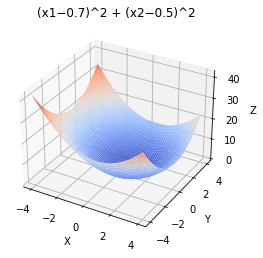

La función es convexa al punto: ( 0.700000000000000 0.500000000000000 )
Se tiene un mínimo local en ( 0.700000000000000 0.500000000000000 )


In [2]:
# Primera función (x1−0.7)^2 + (x2−0.5)^2, se utiliza para evaluar en un punto dado.
#  x: valor en el punto en la cordenada X
#  y: valor en el punto en la cordenada Y
#  return: valor resultante de la función
def func1(x, y):
    return (x - 0.7)*(x - 0.7) + (y - 0.5)*(y - 0.5)


# Derivada parcial en X de la función (x1−0.7)^2 + (x2−0.5)^2
#  x: valor en el punto en la cordenada X
#  y: valor en el punto en la cordenada Y
#  return: valor resultante de la función
def derivada_func1_x(x1, x2):
    return 2*(x1 - 0.7)


# Derivada parcial en Y de la función (x1−0.7)^2 + (x2−0.5)^2
#  x: valor en el punto en la cordenada X
#  y: valor en el punto en la cordenada Y
#  return: valor resultante de la función
def derivada_func1_y(x1, x2):
    return 2*(x2 - 0.5)

# Función para la segunda evaluar la función x1*e^(−x1^2−x2^2 en un punto dado
#  x: valor en el punto en la cordenada X
#  y: valor en el punto en la cordenada Y
#  return: valor resultante de la función
def func2(x1, x2):
    return x1 * math.pow(math.e, -(x1*x1) -(x2*x2))


# Derivada parcial en X de la función x1*e^(−x1^2−x2^2
#  x: valor en el punto en la cordenada X
#  y: valor en el punto en la cordenada Y
#  return: valor resultante de la función
def derivada_func2_x(x1, x2):
    return -(2*x1*x1 - 1)*math.pow(math.e, -(x1*x1) -(x2*x2))


# Derivada parcial en Y de la función x1*e^(−x1^2−x2^2
#  x: valor en el punto en la cordenada X
#  y: valor en el punto en la cordenada Y
#  return: valor resultante de la función
def derivada_func2_y(x1, x2):
    return -2*x1*x2*math.pow(math.e, -(x1*x1) -(x2*x2))


# Función utilizada para graficar una función de tres dimensiones en un rango.
#  funcion: definición de la función que se desea graficar.
#  titulo: string con el título que tendra la grafíca resultado.
#  inicio: valor inicial del rango a graficar.
#  fin: valor final del rango a graficar.
# Se utiliza la bilioteca de matplot para graficar los resultados
def graficar_funcion_R3(funcion, titulo, inicio, fin):

    # Se definen las dimensiones del área a graficar
    x = y = np.arange(inicio, fin, 0.01) # un arreglo con los puntos a graficar
    X, Y = np.meshgrid(x, y)
    # se calculan los resultados de evaluar la función
    zs = np.array([funcion(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    # Operaciones para el manejo del gráfico
    fig = plt.figure()
    ax = fig.gca(projection='3d') # se indica que es una figura de 3D
    surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm) # Se define el arreglo en X, Y y Z
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.title(titulo)
    plt.show()# Se muestra el resultado


x, y = symbols('x,y') # Usado por sympy para decir que son variables de una expresión matematica.


# Función utilizada para escontrar los valores criticos de una función de 3 dimensiones,
# se hace uso de la devidava parcial, para una vez obtenida elavuar en cero y
# obtener los valores minimos o maximos.
#  funcion: string con la función a utilizar
def obtener_critico(funcion):
    # 'Usando sympy'
    # Se calcula las derivadas parciales
    derivada_fx = diff(funcion, x) # para x
    derivada_fy = diff(funcion, y) # para y
    # Se evaluan en 0
    x_dev = solve(Eq(derivada_fx, 0))
    y_dev = solve(Eq(derivada_fy, 0))
    # En caso que se encuentren más de un punto o resultado,
    # es necesario mover los resultados a listas, ya que originalmente
    # se encuentran en diccionarios.
    if isinstance(x_dev[0], dict):
        respx=[]
        respy=[]
        for i in x_dev: # se extraen los valores de X
            for k,v in i.items():
                respx.append(v)
        for i in y_dev: # se extraen los valores de Y
            for k,v in i.items():
                respy.append(v )
        return  respx,  respy
    return x_dev, y_dev


# Función utilizada para encontrar los puntos maximos y minimos de una función,
# con estos puntos es posible definir si se encuentra con una función Concava o Convexa.
#  funcion: string con la función a utilizar, se utiliza un string ya que es lo que ocupa 
#  sympy para su funcionamiento. 
def evaluar_funct3d(funct):
    #obtener puntos criticos
    criticos_x, criticos_y = obtener_critico(funct)
    
    # se itera los valores (puntos) criticos para saber si se trata de una función
    # concava o convexa o bien un minimo o maximo
    for i in range(len(criticos_x)):

        elem_x = criticos_x[i]
        elem_y = criticos_y[i]
        
        # Segun el resultado de la segunda derivada de la función es posible saber las caracteristicas 
        seg_derivada_x = diff(funct, x, 2) # se calcula la devidada en x
        seg_derivada_x = seg_derivada_x.evalf(subs={x:elem_x, y:elem_y}) # se evalua
        
        seg_derivada_y = diff(funct, y, 2) # se calcula la devidada en y
        seg_derivada_y = seg_derivada_y.evalf(subs={x:elem_x, y:elem_y}) # se evalua
        
        # si los valores obtenidos son mayor a cero es una convexa
        if(seg_derivada_x>0 and seg_derivada_y>0):
            print('La función es convexa al punto: (', elem_x, elem_y, ')')
        # si son menores a cero es una concava
        elif(seg_derivada_x<0 and seg_derivada_y<0):
            print('La función es concava al punto: (', elem_x, elem_y, ')')
        # igual para minimo y maximo
        if(seg_derivada_x>0):
            print('Se tiene un mínimo local en (', elem_x, elem_y, ')')
        elif(seg_derivada_x<0):
            print('Se tiene un máximo local en (', elem_x, elem_y, ')')


# Grafica de la primer función
graficar_funcion_R3(func1, '(x1−0.7)^2 + (x2−0.5)^2', -4, 4)


evaluar_funct3d((x - 0.7)*(x - 0.7) + (y - 0.5)*(y - 0.5))

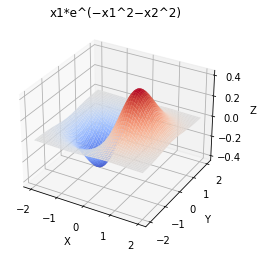

La función es convexa al punto: ( -sqrt(2)/2 0 )
Se tiene un mínimo local en ( -sqrt(2)/2 0 )
La función es concava al punto: ( sqrt(2)/2 0 )
Se tiene un máximo local en ( sqrt(2)/2 0 )


In [3]:
graficar_funcion_R3(func2, 'x1*e^(−x1^2−x2^2)', -2, 2)

evaluar_funct3d(x * exp(-(x*x) -(y*y)))

2. (3 puntos) Implemente el algoritmo del descenso del gradiente con tensores de Pytorch

In [4]:
# Función para obtener el gradiente de una función de 3 dimensiones.
# Dada una función y un punto se itera continuamente calculando la inclinacion (con la derivada)
# hasta llegar a un punto mínimo.
#  func: función original
#  dev_x: derivada parcial en X de la función original 
#  dev_y: derivada parcial en Y de la función original 
#  x: valor en el eje de X 
#  y: valor en el eje de Y 
#  epocas: cantidad de iteraciones en busqueda del punto minimo
#  taza_aprendizaje: factor de aprendisaje 
#  precision: cantidad minima a avanzar por paso 
#  largo_paso_anterion_x: distancia recorrida en el paso anterior en el eje X
#  largo_paso_anterion_y: distancia recorrida en el paso anterior en el eje Y
#  retorna: todos los pasos en el eje X, todos los pasos en el eje Y, cantidad de iteraciones realizadas
def decenso_gradiente(func, dev_x, dev_y, x, y, epocas=1000000, taza_aprendizaje=0.01, precision=0.00000000001, largo_paso_anterion_x=1, largo_paso_anterion_y=1):
    x_historial = [x]
    y_historial = [y]
    iteraciones = 0
    # se itera mientras no se completen las epocas y la distancia de los pasos anteriores 
    # sea mayor a la precisión indicada
    while largo_paso_anterion_x > precision and largo_paso_anterion_y > precision and iteraciones < epocas:
        # se calcula las diferencias
        x = x - taza_aprendizaje * dev_x(x_historial[-1], y_historial[-1])
        y = y - taza_aprendizaje * dev_y(x_historial[-1], y_historial[-1])
        # se actualiza la distancia recorrida
        largo_paso_anterion_x = abs(x - x_historial[-1])
        largo_paso_anterion_y = abs(y - y_historial[-1])
        iteraciones += 1
        # se agrega el historial los valores del nuevo punto
        x_historial.append(x)
        y_historial.append(y)
    return x_historial, y_historial, iteraciones

3. (4 puntos) Para cada función:
	a) Escoja un coeficiente de aprendizaje ? que permita la convergencia
y reporte los resultados para 10 corridas, debe incluir:
		1) La cantidad de iteraciones necesarias para converge.
		2) El punto de convergencia.
        3) Reporte si convergio al punto correcto.

In [5]:
# Función utilizada para obtener un punto aleatorio dado un rango.
#  min_rango: valor minimo del rango
#  max_rango: valor maximo del rango
#  retorna: un X y un Y
def obtener_punto_aleatorio(min_rango, max_rango):
    punto = np.random.rand(2) * abs(max_rango - min_rango) - abs((max_rango - min_rango) / 2)
    return punto[0], punto[1]


# Primera función 
# (x1−0.7)^2 + (x2−0.5)^2
print('La primera función (x1−0.7)^2 + (x2−0.5)^2 tiene punto de convergencia en: (0.7, 0.5)\n')
#Valores del punto inicial generado aleatoriamente
x_inicial, y_inicial = obtener_punto_aleatorio(-4, 4)
cant_iteraciones = 10 # cantidad de iteraciones que se va realizar
for i in range(cant_iteraciones):
    print(f'Iteración número: {i}')
    print(f'Punto inicial x:{x_inicial}, y:{y_inicial}')
    num_epocas = 100000
    c_aprendizaje = 1*10**-i # el factor aprendizaje disminuye en diez cada iteración
    x_historial, y_historial, iteraciones = decenso_gradiente(func1, derivada_func1_x, derivada_func1_y, 
                                           x_inicial, y_inicial, num_epocas, c_aprendizaje)
    print(f'Resultado obtenido (x:{x_historial[-1]}, y:{y_historial[-1]})')
    print(f'Cantidad de etapas: {iteraciones}, con un coficiente de aprendizaje de {c_aprendizaje}')
    print('Convergio al punto correcto' if abs(x_historial[-1] - 0.7) < 0.1e-3 and abs(y_historial[-1] - 0.5) < 0.1e-3 else 'No convergio al punto correcto') 
    print()
    

La primera función (x1−0.7)^2 + (x2−0.5)^2 tiene punto de convergencia en: (0.7, 0.5)

Iteración número: 0
Punto inicial x:2.4017105640570833, y:1.6695261647437896
Resultado obtenido (x:2.4017105640570833, y:1.6695261647437896)
Cantidad de etapas: 100000, con un coficiente de aprendizaje de 1
No convergio al punto correcto

Iteración número: 1
Punto inicial x:2.4017105640570833, y:1.6695261647437896
Resultado obtenido (x:0.7000000000581572, y:0.5000000000399695)
Cantidad de etapas: 108, con un coficiente de aprendizaje de 0.1
Convergio al punto correcto

Iteración número: 2
Punto inicial x:2.4017105640570833, y:1.6695261647437896
Resultado obtenido (x:0.7000000007104943, y:0.500000000488298)
Cantidad de etapas: 1069, con un coficiente de aprendizaje de 0.01
Convergio al punto correcto

Iteración número: 3
Punto inicial x:2.4017105640570833, y:1.6695261647437896
Resultado obtenido (x:0.7000000072544869, y:0.5000000049857543)
Cantidad de etapas: 9627, con un coficiente de aprendizaje de 

In [6]:
# Segunda función 
# x1e^(−x1^2−x2^2)
print('La segunda función x1e^(−x1^2−x2^2) no es convecxa pero tiene un maximo y minimo en: [sqrt(1/2), 0], [-sqrt(1/2), 0]')
print(f'El punto minimo de la funcion es: x:{-math.sqrt(1/2)}, y:{0}\n')

#Valores del punto inicial generado aleatoriamente
x_inicial, y_inicial = obtener_punto_aleatorio(-1, 1)
cant_iteraciones = 10
for i in range(cant_iteraciones):
    print(f'Iteración número: {i}')
    print(f'Punto inicial x:{x_inicial}, y:{y_inicial}')
    num_epocas = 100000
    c_aprendizaje = 0.1*10**-i # se disminuye el factor de aprendizaje
    x_historial, y_historial, iteraciones = decenso_gradiente(func2, derivada_func2_x, derivada_func2_y, 
                                           x_inicial, y_inicial, num_epocas, c_aprendizaje)
    print(f'Resultado obtenido (x:{x_historial[-1]}, y:{y_historial[-1]})')
    print(f'Cantidad de etapas: {iteraciones}, con un coficiente de aprendizaje de {c_aprendizaje}')
    print('Convergio al punto correcto' if abs(x_historial[-1] - -math.sqrt(1/2)) < 0.1e-3 and abs(y_historial[-1] - 0) < 0.1e-3 else 'No convergio al punto correcto') 
    print()

La segunda función x1e^(−x1^2−x2^2) no es convecxa pero tiene un maximo y minimo en: [sqrt(1/2), 0], [-sqrt(1/2), 0]
El punto minimo de la funcion es: x:-0.7071067811865476, y:0

Iteración número: 0
Punto inicial x:0.14157261582565694, y:-0.8139786684195742
Resultado obtenido (x:-0.7071067811402533, y:-1.6648808931528726e-05)
Cantidad de etapas: 135, con un coficiente de aprendizaje de 0.1
Convergio al punto correcto

Iteración número: 1
Punto inicial x:0.14157261582565694, y:-0.8139786684195742
Resultado obtenido (x:-0.7071067806193091, y:-3.4868553672870896e-05)
Cantidad de etapas: 1304, con un coficiente de aprendizaje de 0.010000000000000002
Convergio al punto correcto

Iteración número: 2
Punto inicial x:0.14157261582565694, y:-0.8139786684195742
Resultado obtenido (x:-0.7071067753771335, y:-0.000106938280714212)
Cantidad de etapas: 11770, con un coficiente de aprendizaje de 0.001
No convergio al punto correcto

Iteración número: 3
Punto inicial x:0.14157261582565694, y:-0.8139786

## B. Minimos cuadrados con tensores de Pytorch (6 puntos)
El ejercicio se va a realizar utilizando el conjunto de datos «Default of Credit Card Clients Dataset. Default Payments of Credit Card Clients in Taiwan from 2005». Se adjunta un archivo con los datos (defaultofcredit). Una descripción completa del conjunto de datos esta disponible en 
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset.

1. Cargue el conjunto de datos defaultofcredit.csv, los targets (b) corresponden a la columna: default_payment_next_month.

In [7]:

# Se carga el archivo con los datos
defaultofcredit = pd.read_csv('defaultofcredit.csv', sep=';')
targets = defaultofcredit['default_payment_next_month']

2.  (1 punto) Explore el conjunto de datos, visualice algunas estadisticas y
verifique que no existan valores faltantes.

In [8]:
print(defaultofcredit)
print(defaultofcredit.dtypes)

defaultofcredit.describe()

#sumarle 1 a los PAY y eliminar los 0s

       LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0          20000   24      2      2     -1     -1     -2     -2       3913   
1         120000   26     -1      2      0      0      0      2       2682   
2          90000   34      0      0      0      0      0      0      29239   
3          50000   37      0      0      0      0      0      0      46990   
4          50000   57     -1      0     -1      0      0      0       8617   
...          ...  ...    ...    ...    ...    ...    ...    ...        ...   
29995     220000   39      0      0      0      0      0      0     188948   
29996     150000   43     -1     -1     -1     -1      0      0       1683   
29997      30000   37      4      3      2     -1      0      0       3565   
29998      80000   41      1     -1      0      0      0     -1      -1645   
29999      50000   46      0      0      0      0      0      0      47929   

       BILL_AMT2  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


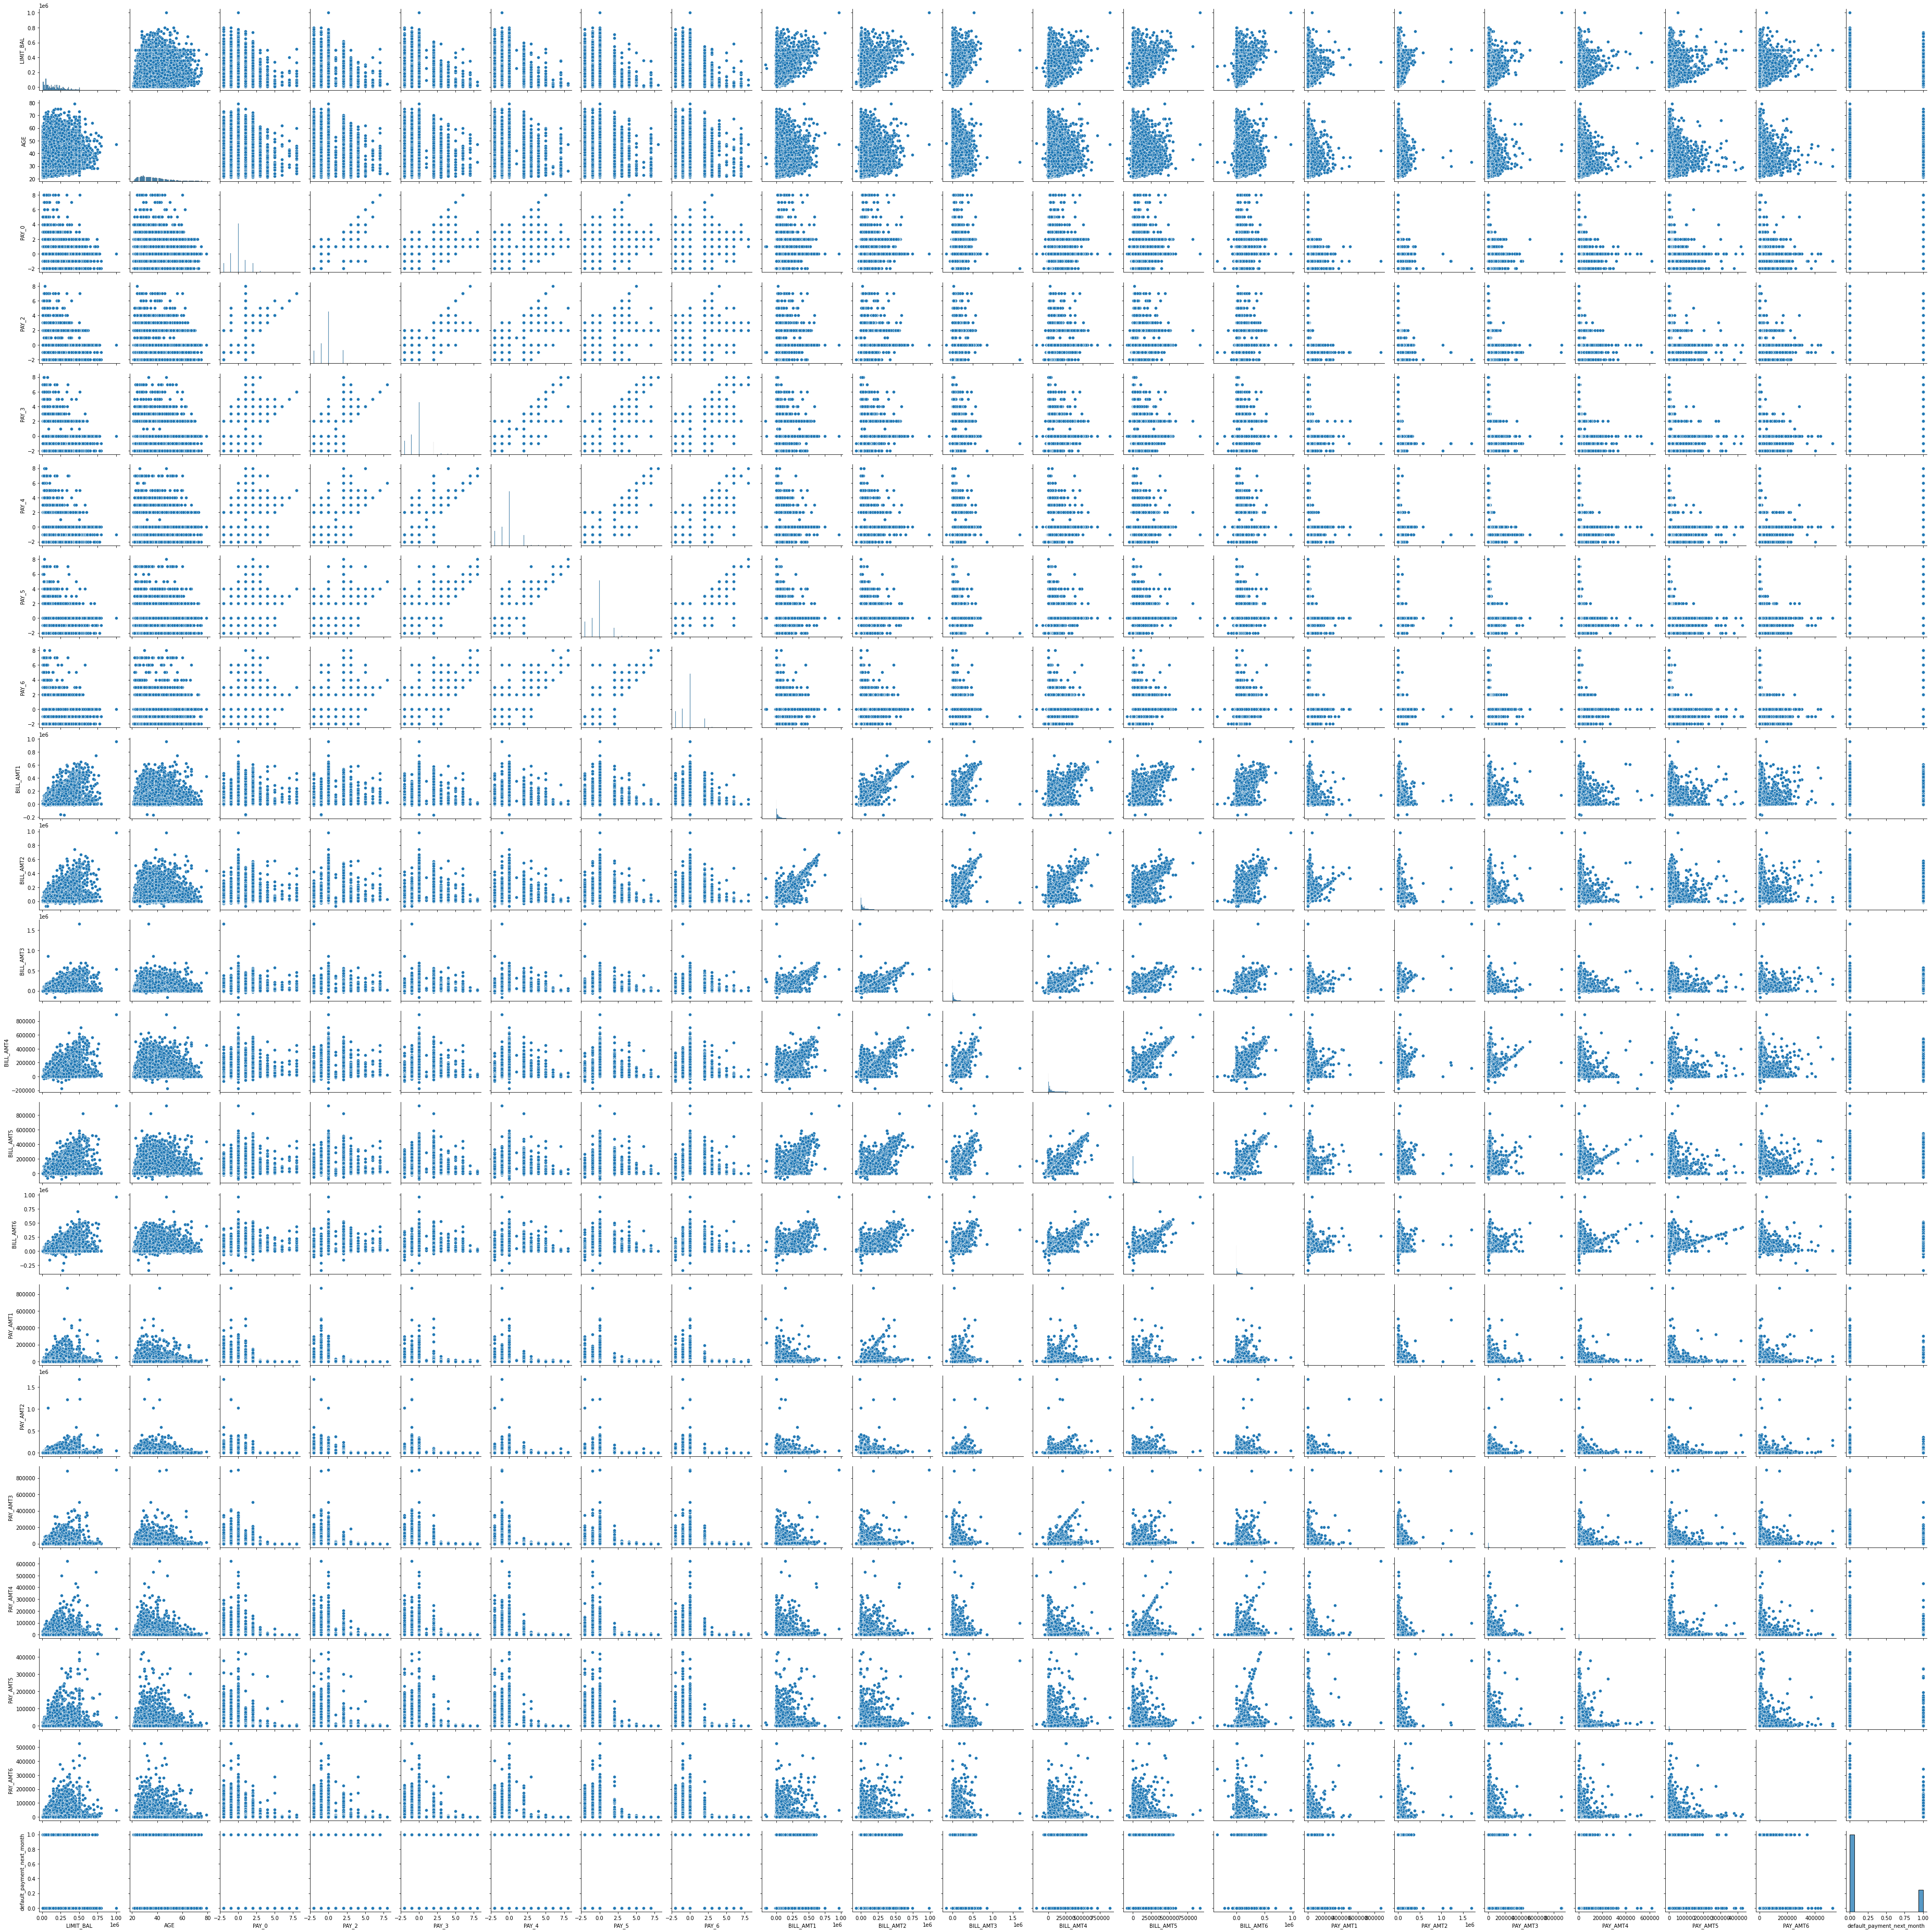

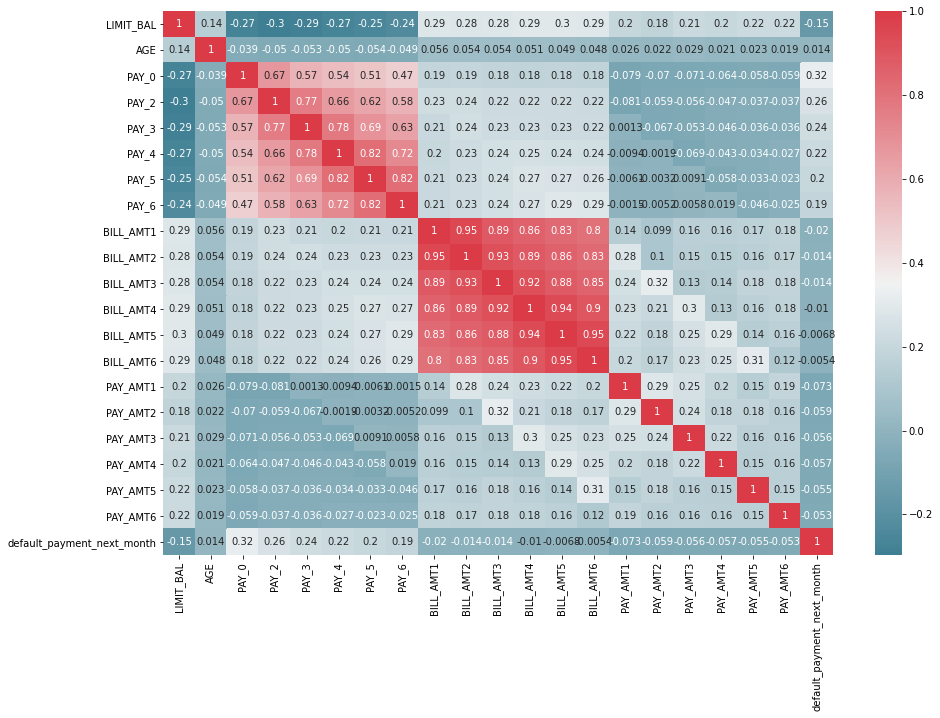

In [9]:
import seaborn as sns
# Se importa la biblioteca seaborn para mostrar la relación 
# entre todos los datos
sns.pairplot(defaultofcredit); # Se muestran todos los datos

# Función para generar el mapa de calor de un conjunto de datos
def mapa_de_calor(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
# Se calcula el mapa de calor    
mapa_de_calor(defaultofcredit)

3. (2 punto) Implemente en python la función $ wopt = estimateOptimunW(X,b) $ la cual recibe los datos y sus respuestas $ (X y b) $ , y estima el vector de pesos optimo w_opt usando mínimos cuadrados. Debe programar en python a nivel de operaciones matriciales y/o vectoriales, no debe invocar a una función pre-construida que calcule mínimos cuadrados. Utilice la función estimateOptimumW para calcular el wopt para los datos.

In [10]:
def matriz_ceros(filas, columnas):
    return [([0]*columnas) for i in range(filas)]

def multiplicar_matrices(matriz1, matriz2):
    '''print(len(matriz1))
    print(matriz1)
    print()
    print(len(matriz2))
    print(matriz2)'''
    
    #comprobar
    if len(matriz1[0]) != len(matriz2):
        return False
    result = matriz_ceros(len(matriz1), len(matriz2[0]))
    # iterating by row of A
    for i in range(len(matriz1)):
        # iterating by coloum by B 
        for j in range(len(matriz2[0])):
            # iterating by rows of B
            for k in range(len(matriz2)):
                result[i][j] += matriz1[i][k] * matriz2[k][j]
    return result

#matriz1 = [[2,1],[3,-1]]
#matriz2 = [[1,3,-2],[4,0,5]]
#print(matriz_ceros(len(matriz1), len(matriz2[0])))
#print(multiplicar_matrices(matriz1, matriz2))

def calcular_identidad(AM):
    if len(AM) != len(AM[0]):
        return False
    resultado = matriz_ceros(len(AM), len(AM[0]))
    for i in range(len(AM)):
        resultado[i][i] = 1
    return resultado

#print(calcular_identidad([[1,2,3],[1,2,3],[1,2,3]]))
    
def calcular_transpuesta(matriz):
    #return np.transpose(matriz)
    
    filas = len(matriz)
    columnas = len(matriz[0])
    transpuesta = matriz_ceros(columnas, filas)
    for i in range(filas):
        for j in range(columnas):
            transpuesta[j][i] = matriz[i][j]
    return transpuesta
    
#print(calcular_transpuesta([[3,2,3],[1,2,3],[1,2,3]]))
    
# Function to calculate and store inverse, returns false if
# matrix is singular
def calcular_inversa(AM):
    
    IM = calcular_identidad(AM)
    for fd in range(len(AM)):
        fdScaler = 1.0 / AM[fd][fd] if AM[fd][fd] != 0 else 1
        for j in range(len(AM)):
            AM[fd][j] *= fdScaler
            IM[fd][j] *= fdScaler
        for i in list(range(len(AM)))[0:fd] + list(range(len(AM)))[fd+1:]:
            crScaler = AM[i][fd]
            for j in range(len(AM)):
                AM[i][j] = AM[i][j] - crScaler * AM[fd][j]
                IM[i][j] = IM[i][j] - crScaler * IM[fd][j]
    return IM

def calcular_seudo_inversa(matriz):
    '''m, Sigma, Vt = SVD(matrix)
    for row in range(min(len(Sigma),len(Sigma[0]))):
        if Sigma[row][row] != 0:
            Sigma[row][row] = 1/Sigma[row][row]
    V = calcular_transpuesta(Vt)
    Sigma = calcular_transpuesta(Sigma)
    UT = calcular_transpuesta(m)
    return multiplicar_matrices(V,multiplicar_matrices(Sigma,UT))'''
    
    transpuesta = calcular_transpuesta(matriz)
    
    inversa = calcular_inversa(multiplicar_matrices(transpuesta, matriz))
    
    return multiplicar_matrices(inversa, transpuesta)

# TargetsAll, SamplesAll
def estimateOptimunW(X, b):
    """ Estimate the optimum W with NO FORS
    param TargetsAll, NumSamples x 1 matrix with target values (1 or -1)
    param SamplesAll, NumSamples x NumDimensions 
    return wOpt, array with optimum weights
    """
    # Calculate w = *Apinverse*Targets
    samplesAllPinv = calcular_seudo_inversa(X)#calcular_seudo_inversa(X)#calcular_seudo_inversa(X)#
    wOpt = multiplicar_matrices(samplesAllPinv, b)
    
    return wOpt

'''X = [1 for i in range(len(b)/2)]
X += [-1 for i in range(len(b)/2)]'''

targets_procesado = calcular_transpuesta([[1.0 if i else -1.0 for i in targets]])
#print(targets)
#print(defaultofcredit.values.tolist())
#print(targets)'''

#print(defaultofcredit.to_numpy().astype('float64'))

## todo crear otra variable para esto 
defaultofcredit_procesado = defaultofcredit.values.tolist()

w_optimo = estimateOptimunW(defaultofcredit_procesado, targets_procesado)

print(w_optimo)

[[-3.4670618955651833e-07], [-0.023909913549645286], [-0.006143759535476887], [-0.003264870943783225], [-0.006876320261869943], [0.0013461101000039645], [0.0014499383136095075], [0.0102762049166729], [-1.4235333679182e-07], [-1.3115120431481366e-08], [7.91487726618535e-08], [-1.1344755122558568e-07], [5.995307053067003e-08], [-9.398128485951548e-08], [-3.2115794871925566e-07], [-9.993662799602615e-08], [1.1319887773036854e-07], [-2.3759147503902437e-07], [-6.103619876969003e-08], [-7.643162977595537e-08], [1.9178647379942868]]


4. (2 punto) Implemente función forward, la cual estima las salidas del modelo al hacer $ T=f(Xw opt) $. Donde la función $ f(x) $ se refiere a la función de activación, que decide a cual clase pertenece cada muestra, según el resultado del producto punto de las muestra y los pesos óptimos, en este caso simplemente usando la función signo o escalón, es decir:

    - $ f(x) = 1, si(x > 0) $
    - $ f(x) = -1, si (x <= 0) $

In [11]:
def forward(SamplesAll, wOpt):
    
    '''print(len(SamplesAll), len(SamplesAll[0]))
    print(SamplesAll)
    print()
    print(len(wOpt), len(wOpt[0]))
    print(wOpt)'''
    """
    Get model output
    param SamplesAll, NumSamples x NumDimensions 
    return: Estimates the model outputs using the step activation function 
            with values of -1 and 1.   
    """
    EstimatedTargets = multiplicar_matrices(SamplesAll, wOpt)
    
    EstimatedTargets = [[1.0 if i>0 else -1.0 for i in EstimatedTargets[j]] for j in range(len(EstimatedTargets))]

    return EstimatedTargets

# Estimated target for sample data A    
EstimatedTargetsAll = forward(defaultofcredit_procesado, w_optimo)

print(EstimatedTargetsAll.count([1.]), EstimatedTargetsAll.count([-1.]))

# Estimated target for sample data B    
#EstimatedTargetsAllB = forward(SamplesAllB, wOptB)

6636 23364


5. (1 punto) Evalué el error de predicción utilizando la distancia euclidiana.

In [12]:
def distancia_euclidiana(x1, x2):
    return math.sqrt((x2-x1)*(x2-x1))

def evaluateError(TargetsAll, EstimatedTargetsAll):
    '''print(len(TargetsAll), len(TargetsAll[0]))
    print(TargetsAll)
    print()
    print(len(EstimatedTargetsAll), len(EstimatedTargetsAll[0]))
    print(EstimatedTargetsAll)'''
    
    error = 0
    for i in range(len(TargetsAll)):
        for j in range(len(TargetsAll[0])):
            error += distancia_euclidiana(TargetsAll[i][j], EstimatedTargetsAll[i][j])
            # TODO ver lo de normalizar
    return error
    
print(evaluateError(targets_procesado, EstimatedTargetsAll))

0.0


## C. Perceptron de una capa con tensores de Pytorch (12 puntos)
 1. (10 puntos) Implemente el algoritmo del perceptron de una capa rescindiendo al máximo de estructuras de tipo for, usando en su lugar operaciones matriciales. **Debe implementarlo sin utilizar ninguna biblioteca, es decir en Pytorch no se puede usar ninguna clase o funcionalidad desarrollada por Pytorch o alguna otra biblioteca.**

In [13]:
def producto_punto(vector1, vector2):
    if len(vector1) != len(vector2):
        print('No se puede realizar el producto punto')
    resultado = 0
    for i in range(len(vector1)):
        resultado += vector1[i]*vector2[i]
        
    return resultado

def multiplicar_vector(escalar, vector):
    resultado = []
    for x in vector:
        resultado.append(escalar*x)
    return resultado

def sumar_vectores(vector1, vector2):
    if len(vector1) != len(vector2):
        print('No se puede realizar el producto punto')
    resultado = []
    for i in range(len(vector1)):
        resultado.append(vector1[i] + vector2[i])
        
    return resultado

class Perceptron:
    
    def __init__(self, fact_aprendizaje, num_epocas):
        self.fact_aprendizaje = fact_aprendizaje
        self.num_epocas = num_epocas
        
    def fit(self, X, y):
        
        self.w = [0]*(1 + len(X[0]))
        self.errors_ = []
        self.epoca_conv = -math.inf
        contador = 0
        
        for epoca in range(self.num_epocas):
            errors = 0
            for xi, target in zip(X, y):
                
#                 print('xi', xi, type(xi))
#                 print('target', target, type(target))
                update = self.fact_aprendizaje * (target - self.predict(xi))
                #print('update', update, type(update))
                resultado = multiplicar_vector(update, xi)
                self.w[1:] = sumar_vectores(self.w[1:], resultado) # sino for
                self.w[0] += update
                errors += int(update != 0.0)
                
            if(self.errors_ != [] and abs(errors - self.errors_[-1]) < 0.1e-2):
                contador += 1
                if contador == 3:
                    self.epoca_conv = epoca - contador
                    break
            else:
                contador = 0
            self.errors_.append(errors)
        
        '''self.w_ = [0]*(1 + len(X[0]))
        self.errors_ = []
        self.epoca_conv = -math.inf
        for epoca in range(self.num_epocas):
            errors = 0
            for xi, target in zip(X, y):
                xi = xi.tolist()
                update = self.fact_aprendizaje * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                
            if(not errors != [] and self.epoca_conv == -math.inf):
                if(abs(errors - self.errors_[-1]) < 0.1e-2):
                    self.epoca_conv = epoca
                    #break
            self.errors_.append(errors)'''
            
            
    def predict(self, X):
        
        """Devolver clase usando función escalón de Heaviside.
        phi(z) = 1 si z >= theta; -1 en otro caso
        """
#         phi = np.where(self.net_input(X) >= 0.0, 1, -1)
#         print('phi')
#         print(phi)
        
        phi = 1.0 if self.net_input(X)>=0 else -1.0
        
        #print('phi', phi, type(phi))
        
        return phi
#[1.0, 1.8803696632385254, 0.06897890567779541]
#[0, 0, 0, 0]
    def net_input(self, X):
        """Calcular el valor z (net input)"""
        # z = w · x + theta
        #z = multiplicar_matrices(X, self.w_[1:]) + self.w_[0]
        
#         print('X', X, type(X))
#         print('self.w', self.w, type(self.w))
        
        z = producto_punto(X, self.w[1:]) + self.w[0]
        return z

 2. Reporte los resultados del clasificador: Para probar su clasificador utilice cumulos de datos generados con la funcion createData disponible en el cuaderno de Jupyter 003_LeastSquares_ejemploV2.ipynb (directorio 014 y 015 Mínimos cuadrados) la cual implementa la generación de datos aleatorios. Tales datos serán utilizados como datos de prueba. Parametrice la cantidad de muestras, matriz de covarianza y medias. La meta es lograr que el perceptor clasifique bien los datos generados. Es decir construir un separador lineal de las clases.

In [14]:

"""
Creates the data (2 classes) to be used for training, using a GMM distribution
@param numberSamplesPerClass, the number of samples per class
@param mean1, means for samples from the class 1
@param mean2, means for samples from the class 2
@param stds1, standard deviation for samples, class 1
@param stds2, standard deviation for samples, class 2
"""
def createData(numberSamplesPerClass = 2, mean1 = [2, 2], mean2 = [6, 6], stds1 = [3, 3], stds2 = [2, 1]):
    '''
    Creates data with gaussian distribution
    '''
    def createDataOneClass(means, covarianceMatrix, numberSamples):
        # Inits the bi gaussian data generator
        multiGaussGenerator = multivariate_normal.MultivariateNormal(means, covarianceMatrix)
        # Takes the samples
        samples = multiGaussGenerator.sample(torch.Size([numberSamples]))
        return samples
   
    means = torch.zeros(2)

    # Ones to concatenate for bias
    ones = torch.ones(numberSamplesPerClass, 1)
    means[0] = mean1[0]
    means[1] = mean1[1]
    # Covariance matrix creation with identity
    covarianceMatrix = torch.eye(2)
    covarianceMatrix[0, 0] = stds1[0]
    covarianceMatrix[1, 1] = stds1[1]
    samplesClass1 = createDataOneClass(means, covarianceMatrix, numberSamplesPerClass)
    means[0] = mean2[0]
    means[1] = mean2[1]
    covarianceMatrix[0, 0] = stds2[0]
    covarianceMatrix[1, 1] = stds2[1]
    samplesClass2 = createDataOneClass(means, covarianceMatrix, numberSamplesPerClass)
    # Concatenates the ones for the bias
    samplesClass1Bias = torch.cat((ones, samplesClass1), 1)
    samplesClass2Bias = torch.cat((ones, samplesClass2), 1)
    samplesAll = torch.cat((samplesClass1, samplesClass2), 0)
    
    #Plot clases
    plt.scatter(samplesClass1[:, 0], samplesClass1[:, 1], marker='^', c='yellow')
    plt.scatter(samplesClass2[:, 0], samplesClass2[:, 1], marker='o', c='darkmagenta')
    plt.show()
  
    #Create samples with bias
    samplesAllBias = torch.cat((samplesClass1Bias, samplesClass2Bias), 0)
    
    #Create targets
    targetsClass1 = torch.ones(numberSamplesPerClass, 1)
    targetsClass2 = -1 * torch.ones(numberSamplesPerClass, 1)
    targetsAll = torch.cat((targetsClass1, targetsClass2), 0)
    
    return (targetsAll, samplesAllBias)

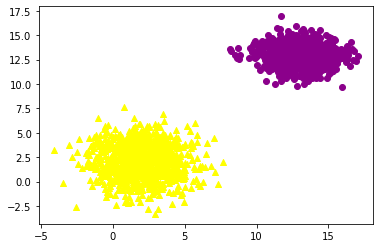

In [15]:
(TargetsAll, SamplesAll) = createData(numberSamplesPerClass = 1000, mean2 = [13, 13])

X_train, Y_train = TargetsAll.tolist(), SamplesAll.tolist()
PerceptronA = Perceptron(0.05, 20)
X_train = [i.pop() for i in X_train]
PerceptronA.fit(Y_train, X_train)

	2.1. (3 puntos) Realice 2 pruebas con distintas distancias de separación entre las muestras de las clases, con una prueba linealmente separable, y otra no, y documente el numero de muestras mal clasificadas y la cantidad de iteraciones para converger. Defina el conjunto de muestras de entrenamiento como el 70 % de las muestras aleatoriamente seleccionadas, y el resto utilícelas como muestras de prueba.
    

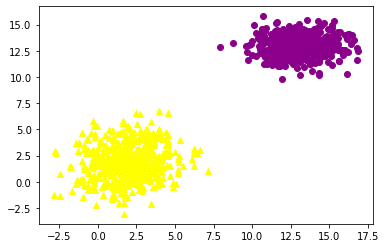

300


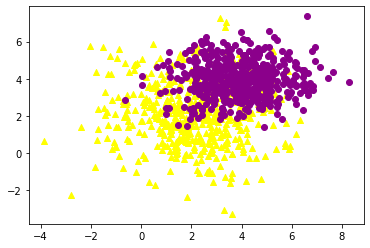

In [16]:
# Sample data A

cantidad_datos = 500
(TargetsAll, SamplesAll) = createData(numberSamplesPerClass = cantidad_datos, mean2 = [13, 13])
# print(TargetsAll) 
# print(TargetsAll.shape)
# print(SamplesAll) 
# print(SamplesAll.shape)

TargetsAll, SamplesAll = TargetsAll.tolist(), SamplesAll.tolist()

def funct():
    return 0.7

random.shuffle(TargetsAll, funct)
random.shuffle(SamplesAll, funct)

TargetsAll = [i.pop() for i in TargetsAll]
SamplesAll = [i[1:] for i in SamplesAll]

indice_entrenamiento = int(2*cantidad_datos*0.3)

print(indice_entrenamiento)

X_train, Y_train = TargetsAll[indice_entrenamiento:], SamplesAll[indice_entrenamiento:]
X_test, Y_test = TargetsAll[:indice_entrenamiento], SamplesAll[:indice_entrenamiento]

(TargetsAllB, SamplesAllB) = createData(numberSamplesPerClass = cantidad_datos, mean2 = [4, 4])
# print(TargetsAll) 
# print(TargetsAll.shape)
# print(SamplesAll) 
# print(SamplesAll.shape)

TargetsAllB, SamplesAllB = TargetsAllB.tolist(), SamplesAllB.tolist()

random.shuffle(TargetsAllB, funct)
random.shuffle(SamplesAllB, funct)

TargetsAllB = [i.pop() for i in TargetsAllB]
SamplesAllB = [i[1:] for i in SamplesAllB]

X_trainB, Y_trainB = TargetsAllB[indice_entrenamiento:], SamplesAllB[indice_entrenamiento:]
X_testB, Y_testB = TargetsAllB[:indice_entrenamiento], SamplesAllB[:indice_entrenamiento]

El programa convergió en la época: 1


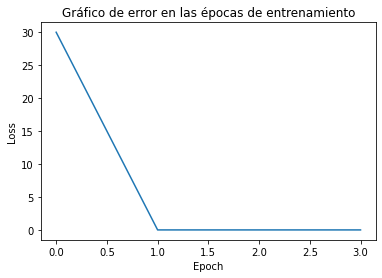

tensor([ 2.0000, -0.1811, -0.1794])
Número de datos mal clasificados: 1


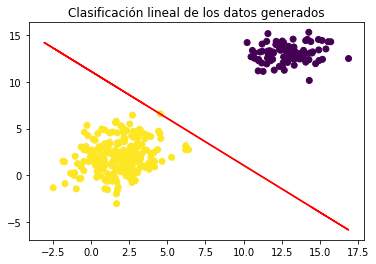

In [30]:
def plotBestFitLine(SamplesAll, perceptron, targets):
    
    SamplesAll = torch.tensor(SamplesAll)
    targets = torch.tensor(targets)
    wOpt = torch.tensor(perceptron.w)
    Y = (-wOpt[0] - (wOpt[1] * SamplesAll)) / wOpt[2]
    
    fallos = 0
    for i in range(len(SamplesAll)):
        if perceptron.predict(SamplesAll[i]) != targets[i]:
            fallos += 1
    
    print('Número de datos mal clasificados:', fallos)
    
    # plot the original data along with the line of best fit
    plt.figure()
    plt.title('Clasificación lineal de los datos generados')
    plt.scatter(SamplesAll[:, 0].numpy(), 
                SamplesAll[:, 1].numpy(), 
                marker="o", c=targets)
    plt.plot(SamplesAll.numpy(), Y.numpy(), "r-")
    #plt.show()

factor_aprendizaje = 0.05
epocas = 100

PerceptronA = Perceptron(factor_aprendizaje, epocas)
#PerceptronA.fit(Y_train, X_train)TargetsAllB, SamplesAllB
PerceptronA.fit(Y_train, X_train)
print('El programa convergió en la época:', PerceptronA.epoca_conv)

plt.figure()
plt.plot(PerceptronA.errors_)
plt.title('Gráfico de error en las épocas de entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plotBestFitLine(Y_test, PerceptronA, X_test)

El programa convergió en la época: -inf


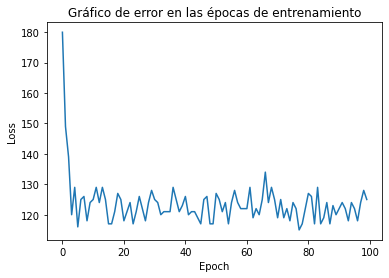

Número de datos mal clasificados: 152


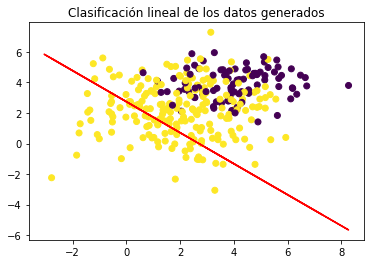

In [18]:
PerceptronB = Perceptron(factor_aprendizaje, epocas)
PerceptronB.fit(Y_trainB, X_trainB)

print('El programa convergió en la época:', PerceptronB.epoca_conv)

plt.figure()
plt.plot(PerceptronB.errors_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Gráfico de error en las épocas de entrenamiento')
plt.show()

plotBestFitLine(Y_testB, PerceptronB, X_testB)

    
	2.2. (2 puntos) Grafique el error o perdida de entrenamiento de al menos dos corridas, con todas las iteraciones de esas corridas. Ejemplo de gráfica de error por época:
<img src="./datos/ejemplo_grafica">

In [19]:
print(PerceptronB.errors_)

[180, 149, 139, 120, 129, 116, 125, 126, 118, 124, 125, 129, 124, 129, 125, 117, 117, 121, 127, 125, 118, 121, 124, 117, 121, 126, 122, 118, 124, 128, 125, 124, 120, 121, 121, 121, 129, 125, 121, 123, 126, 120, 121, 121, 119, 117, 125, 126, 117, 117, 127, 125, 121, 124, 117, 124, 128, 124, 122, 122, 122, 129, 119, 122, 120, 125, 134, 124, 129, 125, 119, 125, 119, 122, 118, 124, 122, 115, 117, 122, 127, 126, 117, 129, 117, 119, 124, 117, 123, 120, 122, 124, 122, 118, 124, 122, 118, 124, 128, 125]


## D. Redes neuronales convolucionales (16 puntos)
**Utilice PyTorch** para implementar una red neuronal profunda para clasificar imágenes utilizando capas convolucionales. 
Para el ejercicio seleccione alguno de los siguientes conjuntos de datos:

 - Natural Images: https://www.kaggle.com/prasunroy/natural-images
 - Dogs & Cats images (elegido): https://www.kaggle.com/chetankv/dogs-cats-images
 - The Oxford-IIIT Pet Dataset: https://www.kaggle.com/devdgohil/the-oxfordiiit-pet-dataset
 - Intel Image Classification: https://www.kaggle.com/puneet6060/intel-image-classification
 - Flower Color Images: https://www.kaggle.com/olgabelitskaya/flower-color-images

Realice las siguientes actividades vistas en clase:

1. (2 puntos) Cargar y normalizar los datos.

In [20]:

# Es necesario descargar previamente los datos
# Los datos se encuentran en https://www.kaggle.com/chetankv/dogs-cats-images
# es necesario descargarlos y descomprimirlos dentro de la carpeta datos

# Ruta de los directorios donde se encuentran los datos.
DIR_DATOS = 'datos/dataset/training_set'
DIR_DATOS_PRUEBA = 'datos/dataset/test_set'

transformar = transforms.Compose(
    [transforms.ToTensor(), # se pasan los datos a tensor
     transforms.Resize((100,100)), # se define el tamaño de las imagenes a utilizar 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # norma utilizada
tam_lote = 4
# se leen los datos de entrenamiento
conjunto_datos = ImageFolder(DIR_DATOS, transform=transformar)
# se cargan los datos 
datos_entrenamiento = DataLoader(conjunto_datos, batch_size=tam_lote, shuffle=True, num_workers=4)

# se cargan los datos de prueba
conjunto_datos_prueba = ImageFolder(DIR_DATOS_PRUEBA, transform=transformar)
datos_prueba = DataLoader(conjunto_datos_prueba, batch_size=tam_lote, shuffle=True, num_workers=4)

# Se definen las clases en este caso gato, perro
clases = ('Gato', 'Perro')
cant_clases = 2

2. (2 puntos) Explorar los datos

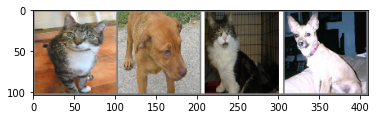

 Gato Perro  Gato Perro


In [21]:
# Funciones para desplegar algunas imágenes de forma aleatoria.
#  img: imagen a desplegar
def mostrar_imagen(imagen):
    imagen = imagen / 2 + 0.5     # se desnormaliza
    npimagen = imagen.numpy()
    plt.imshow(np.transpose(npimagen, (1, 2, 0))) # se calcula la transpuesta
    plt.show() # se imprime la imagen


# obtener imágenes del conjunto de entrenamiento al azar
iterador_datos = iter(datos_entrenamiento)
imagenes, etiquetas = iterador_datos.next()

# mostrar las imágenes
mostrar_imagen(torchvision.utils.make_grid(imagenes))

# mostrar las etiquetas
print(' '.join('%5s' % clases[etiquetas[j]] for j in range(tam_lote)))

3. (2 puntos) Definir la red convolucional

In [22]:
# Crear el modelo de aprendizaje profundo, se crea una clase 
# que envuelve la clase nn.Module 

class Net(nn.Module):
    # Modelo de red convolucional.
    # :params
    #    torch.nn.Module clase que implenta la funionalidad de redes neuronales de Pytorch 

    # constructor de la clase
    def __init__(self):
        super(Net, self).__init__() # hereda los atributos de la clase padre

        #torch.nn.Conv2d(in_channels, out_channels, kernel_size...
        # se define la primera capa convulucional con los datos in_channels = 3, 
        # out_channels = 6, kernel_size = 5
        self.conv1 = nn.Conv2d(3, 6, 5)

        # se determina el MaxPool con datos kernel_size = 2, stride = 2
        # por los tanto el tamaño de los datos se disminuye en dos por que se tiene un stride de 2
        self.pool = nn.MaxPool2d(2, 2)  

        #torch.nn.Conv2d(in_channels, out_channels, kernel_size...
        # se define la primera capa convulucional con los datos in_channels = 6, 
        # out_channels = 16, kernel_size = 5
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        #Capas perceptrón del modelo
        # primera capa lineal de la red
        # se define las caracteristicas de entrada y salida con valores
        # torch.nn.Linear(in_features, out_features...
        # in_features =  7744 out_features = 120
        self.fc1 = nn.Linear(16 * 22 * 22, 120) 
        
        # segunda capa lineal de la red
        # se define las caracteristicas de entrada y salida con valores
        # torch.nn.Linear(in_features, out_features...
        # in_features =  120 out_features = 84
        self.fc2 = nn.Linear(120, 84)
        
        # ultima capa de la red
        # se define las caracteristicas de entrada y salida con valores
        # torch.nn.Linear(in_features, out_features...
        # in_features =  84 out_features = 84
        self.fc3 = nn.Linear(84, 2)
    
    # Metodo utilizado para implementa la función de activación y realiza 
    # el pase hacia la siguiente capa de la red
    # x : datos de la imagen a procesar.
    # return: resultado de la funcion activación
    def forward(self, x):
        #Pase de la entrada por todas las capas de la red.
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), 16 * 22 * 22)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# se define una instancia de la red
net = Net()

4. (2 puntos) Definir los hiperparametros, por ejemplo, función de perdida,
el optimizador, entre otros.

In [23]:
# se define la función de perdida
# se utiliza CrossEntropyLoss ya que es utili para la clasificación por clases
# además este criterio combina LogSoftmaxy NLLLossen una sola clase
criterio = nn.CrossEntropyLoss()

# se define el optiminzador se usa descenso de gradiente estocástico
#  lr: tasa de aprendizaje 
#  momentum: factor de impulso
optimizador = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

5. (2 puntos) Entrenar la red

[1,  1000] pérdida: 0.688
[1,  2000] pérdida: 0.674
[2,  1000] pérdida: 0.644
[2,  2000] pérdida: 0.633
[3,  1000] pérdida: 0.599
[3,  2000] pérdida: 0.588
[4,  1000] pérdida: 0.559
[4,  2000] pérdida: 0.534
[5,  1000] pérdida: 0.492
[5,  2000] pérdida: 0.468
[6,  1000] pérdida: 0.398
[6,  2000] pérdida: 0.423
[7,  1000] pérdida: 0.314
[7,  2000] pérdida: 0.357
[8,  1000] pérdida: 0.205
[8,  2000] pérdida: 0.250
[9,  1000] pérdida: 0.121
[9,  2000] pérdida: 0.174
[10,  1000] pérdida: 0.106
[10,  2000] pérdida: 0.124
[11,  1000] pérdida: 0.045
[11,  2000] pérdida: 0.111
Fin del entrenamiento


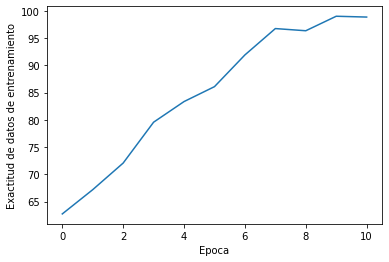

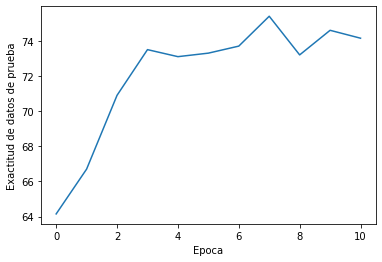

In [24]:
# Función utilizada para calcular la Exactitud (accuracy) en los datos
#  loader: conjunto de datos 
def calcular_accuracy(conjunto_datos):
    correctos = 0
    total = 0
    for datos in conjunto_datos:
        imagenes, etiquetas = datos
        salida = net(imagenes)
        _, predicho = torch.max(salida.data, 1)
        total += etiquetas.size(0)
        correctos += (predicho == etiquetas).sum().item()
        
    return ((100*correctos)/total)

# cantidad de ciclos de entrenamiento o épocas que se van a realizar
numero_epocas = 11 

# se almacenan los resultados obtenidos de cada epoca de entrenamiento
# para posteriomente graficarlos
entrenamiento_accurracy = []
prueba_accurracy = []
# se realiza un entrenamieto por epocas, por lo que se itera
for epoca in range(numero_epocas):  
    
    perdida_corrida = 0.0
    
    for i, datos in enumerate(datos_entrenamiento, 0):
        
        # obtener los datos de entrada; 
        # data es una lista de la forma [inputs, labels]
        entrada, etiquetas = datos

        # inicializar los parámetros del gradiente.
        optimizador.zero_grad()

        # Se realizan las predicciones con el modelo. 
        # Este código ejecuta el forward de las entradas.
        salida = net(entrada)
        
        # Se calcula la pérdida utilizando Cross Entropy Loss
        perdida = criterio(salida, etiquetas)       
        perdida.backward()
        
        #El optimizador realiza las actualizaciones a través del método step().
        optimizador.step()

        # imprimir estadisticas
        perdida_corrida += perdida.item()
        if i % 1000 == 999:    # imprimir mensaje cada 1000 mini-batches
            print('[%d, %5d] pérdida: %.3f' %
                  (epoca + 1, i + 1, perdida_corrida / 1000))
            perdida_corrida = 0.0
    # se calcula los resultados de predicción de los datos de entrenamiento        
    entrenamiento_accurracy.append(calcular_accuracy(datos_entrenamiento))
    # se calcula los resultados de predicción de los datos de entrenamiento  
    prueba_accurracy.append(calcular_accuracy(datos_prueba))
            
print('Fin del entrenamiento')

# Se grafíca la Exactitud por epoca de entrenamiento
# Resultados con los datos de entrenamiento
plt.figure()
plt.plot(entrenamiento_accurracy)
plt.xlabel('Epoca')
plt.ylabel('Exactitud de datos de entrenamiento')
plt.show()

# Resultados con los datos de prueba
plt.figure()
plt.plot(prueba_accurracy)
plt.xlabel('Epoca')
plt.ylabel('Exactitud de datos de prueba')
plt.show()

6. (3 puntos) Evaluar el modelo resultante Accuracy, Precision, Recall y F1-score (investigue como se utilizan estas medidas en clasificación)

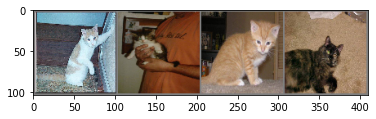

Etiqueta verdadera:   Gato  Gato  Gato  Gato
Predicción:  Perro Perro  Gato  Gato


In [25]:
iterador_datos = iter(datos_prueba)
imagenes, etiquetas = iterador_datos.next()

# imprimir algunos ejemplos y la etiqueta original (la verdad)
mostrar_imagen(torchvision.utils.make_grid(imagenes))
print('Etiqueta verdadera: ', ' '.join('%5s' % clases[etiquetas[j]] for j in range(4)))

salida = net(imagenes)

_, prediccion = torch.max(salida, 1)

print('Predicción: ', ' '.join('%5s' % clases[prediccion[j]]
                              for j in range(tam_lote)))

In [27]:
# Accuracy
# Función utilizada para calcular la Exactitud de los datos en la red.
#  datos: datos utilizadas para comprobar la predicción del sistema
#  return: los datos verdadedos / todos los datos
def accuracy(datos):
    correcto = 0
    total = 0
    # se iteran los datos en mini lotes de tamaño 4
    for data in datos:
        imagenes, etiqueta = data
        salida = net(imagenes)
        _, prediccion = torch.max(salida.data, 1)
        total += etiqueta.size(0) # se suman la cantidad de datos explorados
        # se compara los que resultaron correctamente clasificados
        correcto += (prediccion == etiqueta).sum().item() 
        
    return (correcto/total)

# Precision
# Función utilizada para obtener la precisión de los datos de una clase en especifico
#  datos: datos utilizadas para comprobar la predicción del sistema
#  clase_actual: 0 para gato y 1 para perro
#  return: datos verdaderos /(datos verdaderos+datos falsos)
def precision(datos, clase_actual):
    correcto = 0
    total = 0
    # se iteran los datos en mini lotes de tamaño 4
    for data in datos:
        imagenes, etiquetas = data
        salida = net(imagenes)
        _, prediccion = torch.max(salida, 1) 
        c = (prediccion == etiquetas).squeeze() 
        for i in range(tam_lote): # se itera el mini lote de datos
            # se verifica si pertenece a la clase actual correcpondiente
            if prediccion[i] == clase_actual:
                # se compara los que resultaron correctamente clasificados
                correcto += c[i].item()
                total += 1 # se suman la cantidad de datos explorados de la clase
    return (correcto/total)

# Recall
# Función utilizada para obtener la Exhaustividad de los datos de una clase en especifico
#  datos: datos utilizadas para comprobar la predicción del sistema
#  clase_actual: 0 para gato y 1 para perro
#  return: datos verdaderos /(datos verdaderos+datos falsos mal clasificados)
def recall(datos, clase_actual):
    correcto= 0
    total = 0
    # se iteran los datos en mini lotes de tamaño 4
    for data in datos:
        imagenes, etiquetas = data
        salida = net(imagenes)
        _, prediccion = torch.max(salida, 1)
        c = (prediccion == etiquetas).squeeze()
        for i in range(tam_lote): # se itera el mini lote de datos
            if etiquetas[i] == clase_actual:
                 # se compara los que resultaron correctamente clasificados
                correcto += c[i].item()
                total += 1 # se suman la cantidad de datos explorados de la clase
    return (correcto/total)

# F1-score
# Función utilizada para obtener la calificación F1 de los datos de una clase en especifico
#  datos: datos utilizadas para comprobar la predicción del sistema
#  clase_actual: 0 para gato y 1 para perro
#  return: 2*(recall*precision)/(recall+precision)
def f1_score(datos, clase_altual):
    precision_r = precision(datos, clase_altual)
    recall_r = recall(datos, clase_altual)
    return 2*(recall_r*precision_r)/(recall_r+precision_r)

print(f'Exactitud (accuracy): {accuracy(datos_prueba)  * 100}% \n')
for i in range(cant_clases):
    print(f'Precisión (precision) en la clase {clases[i]}: {round(precision(datos_prueba, i), 4)  * 100}%\n')
for i in range(cant_clases):
    print(f'Exhaustividad (recall) en {clases[i]}: {round(recall(datos_prueba, i), 4) * 100}% \n')
for i in range(cant_clases):
    print(f'Puntuación f1 (f1-score) en la clase {clases[i]}: {round(f1_score(datos_prueba, i), 4) * 100}% \n')

Exactitud (accuracy): 74.15% 

Precisión (precision) en la clase Gato: 75.13%

Precisión (precision) en la clase Perro: 73.24000000000001%

Exhaustividad (recall) en Gato: 72.2% 

Exhaustividad (recall) en Perro: 76.1% 

Puntuación f1 (f1-score) en la clase Gato: 73.64% 

Puntuación f1 (f1-score) en la clase Perro: 74.64% 



In [28]:
# se obtienen las etiquetas y predicciones para obtener los resultados desde la biblioteca de sklearn
etiquetas_completas = []
prediccion_completas = []
with torch.no_grad():
    # se itera y obtiene las etiquetas y predicciones y se guardan
    for data in datos_prueba:
        imagenes, etiquetas = data
        # se guardan las etiquetas en la lista etiquetas_completas
        etiquetas_completas = etiquetas_completas + etiquetas.tolist()
        salida = net(imagenes)
        _, prediccion = torch.max(salida, 1)
        # se guardan las etiquetas en la lista prediccion_completas
        prediccion_completas = prediccion_completas + prediccion.tolist()

from sklearn.metrics import classification_report
# se muestran los resultados para comparar con los obtenidos
print(classification_report(etiquetas_completas, prediccion_completas, target_names=["Gato", "Perro"]))

              precision    recall  f1-score   support

        Gato       0.75      0.72      0.74      1000
       Perro       0.73      0.76      0.75      1000

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000



7. (3 puntos) Presentar al menos cuatro conclusiones.

A continuación se presentan las conclusiones obtenidas con el presente modelo de clasificación y los datos utilizados para su entrenamiento y prueba:
 - <div style='text-align: justify;'> Las imágenes utilizadas para el entrenamiento y prueba de la red neuronal cuentan con distintas características entre las más importantes el tamaño o resolución que era muy variable, por lo tanto fue necesario realizar una re-dimensión de las mismas, por lo que fue necesario probar con distintos valores  de entre 50 y 150 pixeles por imagen. Aumentar o disminuir el tamaño de las imágenes no significo una mejora significante en los resultados y además que el tiempo de procesamiento aumenta significativamente con el aumento de los tamaños. </div>
 - <div style='text-align: justify;'> Los resultados mostraron una mayor precisión a la hora de evaluar imágenes de la clase de Gatos, sin embargo los resultados de exhaustividad y puntuación F1 los resultados fueron los contrarios ya que la clases Perro obtuvo un mayor porcentaje en comparación con la clase Gato. La razón a la que se deben estos resultados puede estar asociada a que muchos de los ejemplares de la clases Perro cuentan con un gran volumen de pelo, el cual es más común en los ejemplares de la clase Gato. </div>
 - <div style='text-align: justify;'> 
    Durante el proceso de estudio de los datos fue necesario comprobar el entrenamiento de los datos con distinta cantidad de épocas y distinto orden en los datos de entrenamiento (se barajan los datos). Para comprobar la exactitud por época se decidió  graficar los resultados por época de entrenamiento (las graficas presenten debajo de la fase de entrenamiento), sin embargo los resultados presentaban con la peculiaridad que se encontraban patrones muy extraños de una época a otra (se presentan altibajos constante). La razón por la que consideramos que sucede dicha peculiaridad es el orden de las imágenes de entrenamiento, ya que fue la única diferencia en las distintas ejecuciones que se realizaron. Además que se puede comprobar una menor precisión en los datos de prueba comparándolos con los datos de entrenamiento, sin embargo, creemos que es esperable en cualquier experimento de este tipo.
</div>
 - <div style='text-align: justify;'> Para el entrenamiento y prueba de las redes neuronales es necesario que los datos (en este caso las imágenes) sean correctos, es decir, que coincidan con las clases establecidas (Gato y Perro), a pesar de ello, fue posible identificar entre los datos imágenes incoherentes, principalmente en los datos de prueba (es necesario una mejor comprobación de los datos de entrenamiento). Entre los datos incongruentes se encuentran las imágenes: dogs4344, dogs4367, dogs4324, cats4688, esto podría afectar de manera muy negativa en el rendimiento de nuestro sistema. </div>
